In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(360, 360)


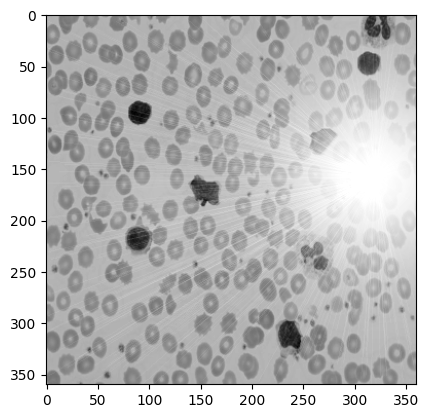

In [32]:
img = cv2.imread('../images/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [33]:
N = 10

In [34]:
dimh = np.int32(gImg.shape[0]/N)
dimw = np.int32(gImg.shape[1]/N)

dh_rest = np.int32(gImg.shape[0]%N)
dw_rest = np.int32(gImg.shape[1]%N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gImg.shape[0], gImg.shape[1]))

In [35]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  sum = np.int32(sum)
  avg = 0

  for y in range(h, h+dimh):
    for x in range(w, w+dimw):
      sum = sum + img[y][x]
      count = count + 1

  avg = np.int32(sum/count)
  return avg

(10, 10)


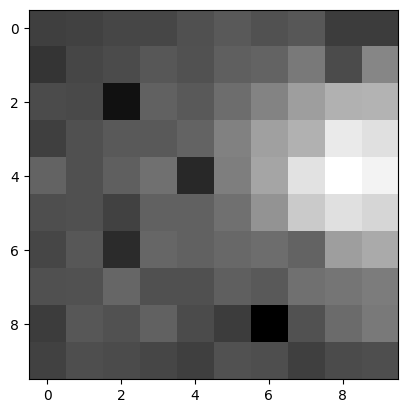

In [36]:
for h in range(0, gImg.shape[0]-dh_rest, dimh):
  for w in range(0, gImg.shape[1]-dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gImg, dimh, dimw, h, w)

plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

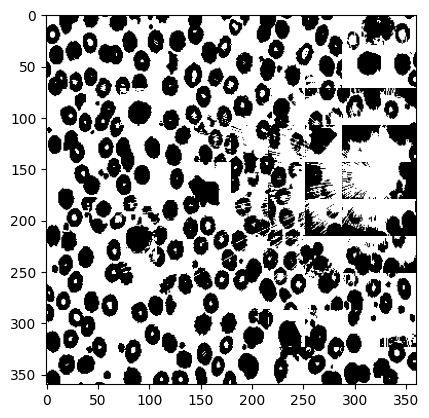

In [37]:
for h in range(0, gImg.shape[0]-dh_rest):
  for w in range(0, gImg.shape[1]-dw_rest):
    if(gImg[h,w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
      outimg[h,w] = 255
    else:
      outimg[h,w] = 0

plt.imshow(outimg, cmap='gray')